# Fase 5 | Modelo de Regresión Logistica - Dataset Titanic

# 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [136]:
#Cargar las librerias necesrias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones



# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix



In [137]:
# lectura de datos en Python y lo cargamos en la variable Datos

dfTitanic = pd.read_csv('Titanic-Dataset.csv')

In [138]:
# Vista general de los datos

dfTitanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [139]:
# Reevisamos las columnas para luego cambiar los nombres a español y hacer mas comodo el trabajo
print(dfTitanic.columns)



Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [140]:
# Se define un nuevo conjunto de nombres para las columnas
columnasEspanol = {'PassengerId': 'IdPasajero', 'Survived':'Sobrevivio', 'Pclass': 'Clase', 'Name':'Nombre','Sex':'Sexo','Age':'Edad',
                   'SibSp': 'HermanosEsposos','Parch': 'PadresHijos','Ticket':'Tiquete','Fare':'Tarifa','Cabin':'Cabina','Embarked':'PuertoEmbarque',}
# Se renombran las columnas
dfTitanic = dfTitanic.rename(columns=columnasEspanol)

In [141]:
# Reevisamos las columnas para luego cambiar los nombres a español y hacer mas comodo el trabajo
print(dfTitanic.columns)


Index(['IdPasajero', 'Sobrevivio', 'Clase', 'Nombre', 'Sexo', 'Edad',
       'HermanosEsposos', 'PadresHijos', 'Tiquete', 'Tarifa', 'Cabina',
       'PuertoEmbarque'],
      dtype='object')


### Descrpción de las variables:

- **IdPasajero**: Identificación única para cada pasajero en el Titanic.

- **Sobrevivio**: Indica si el pasajero sobrevivió.

- **Clase**: Clase en la que viajaba el pasajero.

- **Nombre**: Nombre completo del pasajero.

- **Sexo**: Sexo del pasajero.

- **Edad**: Edad del pasajero en años.

- **HermanosEsposos**: Número de hermanos y/o esposos(as) que viajaban con el pasajero.

- **PadresHijos**: Número de padres y/o hijos que viajaban con el pasajero.

- **Tiquete**: Número del billete del pasajero.

- **Tarifa**: Tarifa pagada por el billete del pasajero.

- **Cabina**: Número de cabina del pasajero.

- **PuertoEmbarque**: Puerto en el que abordó el barco.

In [142]:
# Descripción de los datos númericos
dfTitanic.describe()

,IdPasajero,Sobrevivio,Clase,Edad,HermanosEsposos,PadresHijos,Tarifa
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [143]:
dfTitanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IdPasajero       891 non-null    int64  
 1   Sobrevivio       891 non-null    int64  
 2   Clase            891 non-null    int64  
 3   Nombre           891 non-null    object 
 4   Sexo             891 non-null    object 
 5   Edad             714 non-null    float64
 6   HermanosEsposos  891 non-null    int64  
 7   PadresHijos      891 non-null    int64  
 8   Tiquete          891 non-null    object 
 9   Tarifa           891 non-null    float64
 10  Cabina           204 non-null    object 
 11  PuertoEmbarque   889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


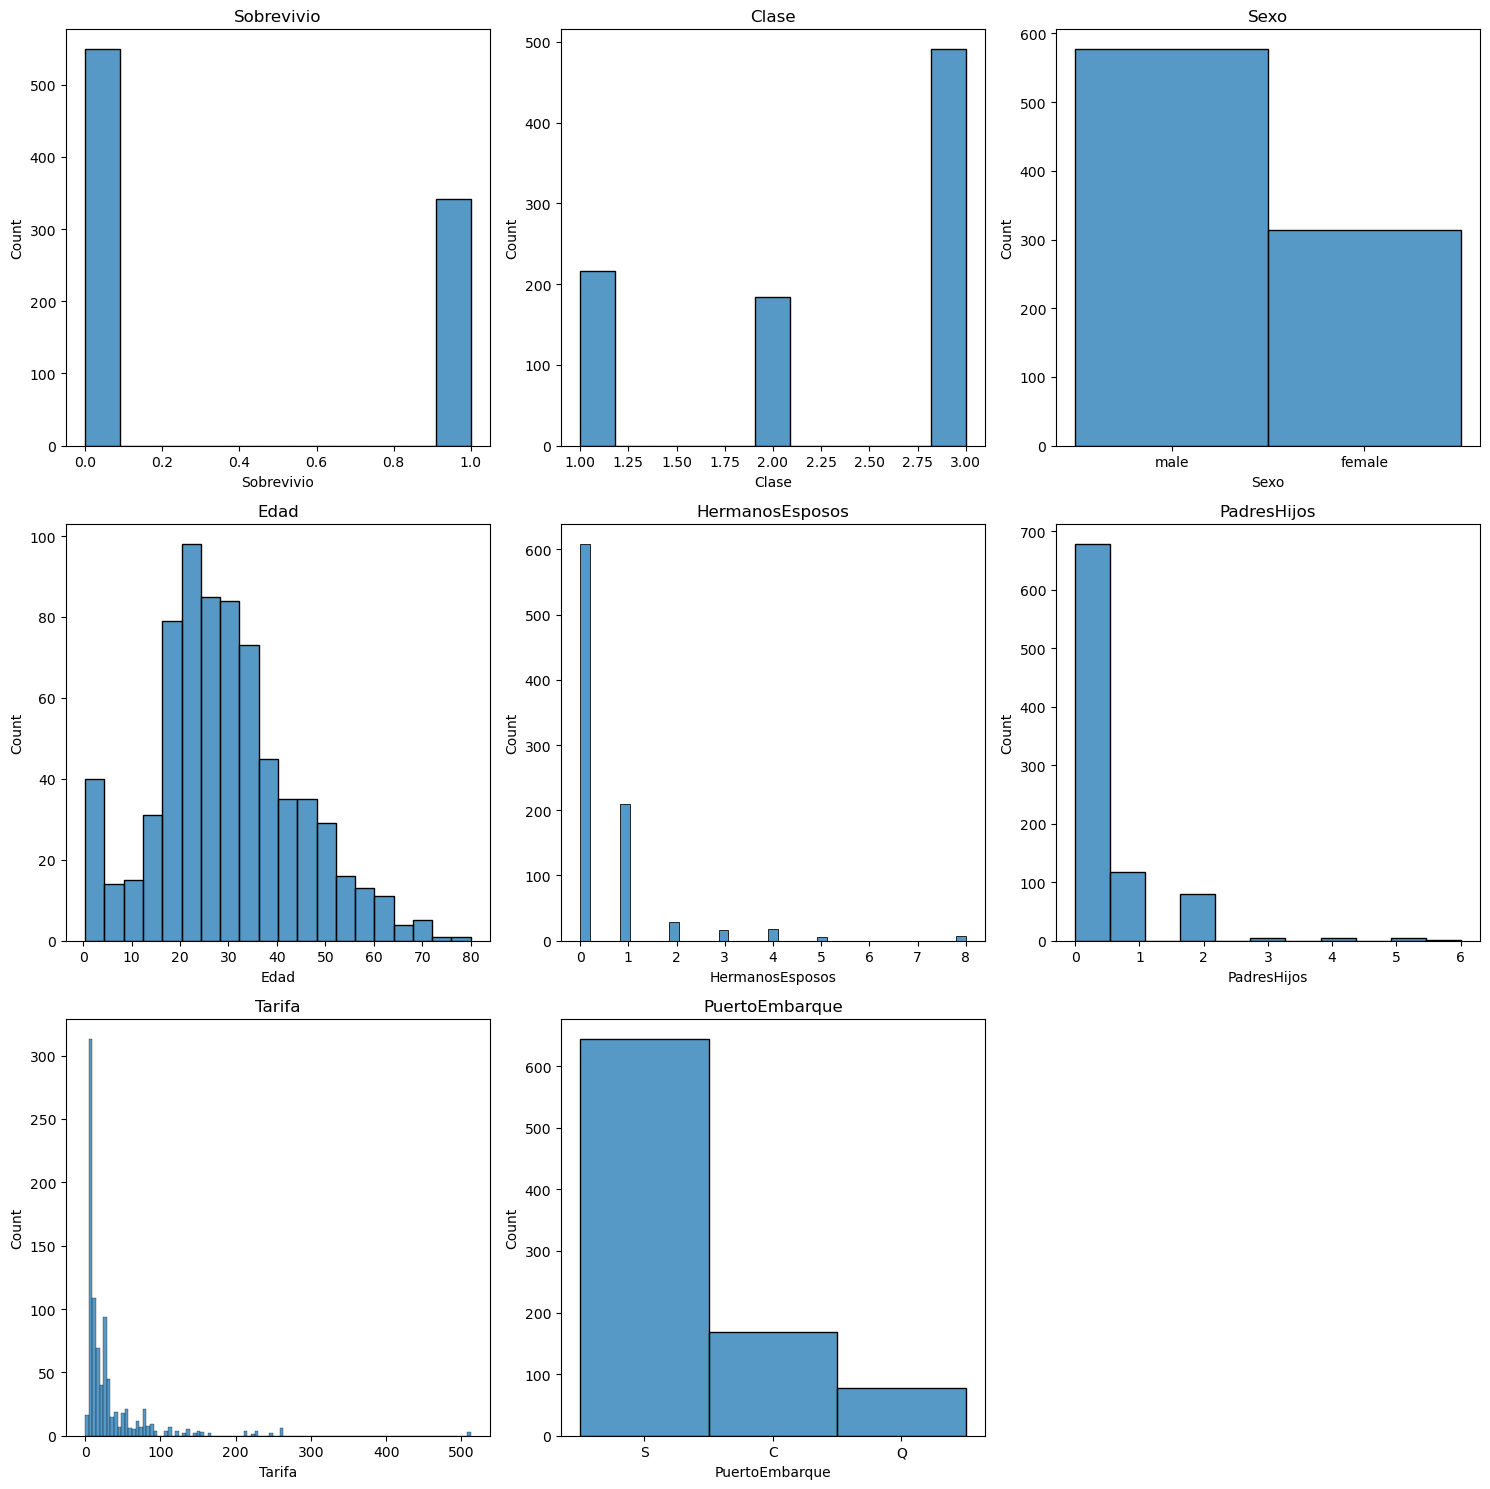

In [144]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

sns.histplot(ax=axes[0, 0], x=dfTitanic["Sobrevivio"]).set(title="Sobrevivio");
sns.histplot(ax=axes[0, 1], x=dfTitanic["Clase"]).set(title="Clase");
sns.histplot(ax=axes[0, 2], x=dfTitanic["Sexo"]).set(title="Sexo");
sns.histplot(ax=axes[1, 0], x=dfTitanic["Edad"]).set(title="Edad");
sns.histplot(ax=axes[1, 1], x=dfTitanic["HermanosEsposos"]).set(title="HermanosEsposos");
sns.histplot(ax=axes[1, 2], x=dfTitanic["PadresHijos"]).set(title="PadresHijos");
sns.histplot(ax=axes[2, 0], x=dfTitanic["Tarifa"]).set(title="Tarifa");
sns.histplot(ax=axes[2, 1], x=dfTitanic["PuertoEmbarque"]).set(title="PuertoEmbarque");
# sns.histplot(ax=axes[2, 2], x=dfTitanic["Cabina"]).set(title="Cabina");

# Eliminar el último eje, ya que no se utiliza
fig.delaxes(axes[2, 2])

plt.tight_layout()
plt.show()

## <span style="color:red">Hasta acá es la primera parte del EDA. Para continuar, primero es necesario realizar limpieza y transformación de datos para realizarlo de forma correcta.</span>



# 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [145]:
dfTitanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IdPasajero       891 non-null    int64  
 1   Sobrevivio       891 non-null    int64  
 2   Clase            891 non-null    int64  
 3   Nombre           891 non-null    object 
 4   Sexo             891 non-null    object 
 5   Edad             714 non-null    float64
 6   HermanosEsposos  891 non-null    int64  
 7   PadresHijos      891 non-null    int64  
 8   Tiquete          891 non-null    object 
 9   Tarifa           891 non-null    float64
 10  Cabina           204 non-null    object 
 11  PuertoEmbarque   889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [146]:
# Cambiar valores en texto por números
# Mapeo de valores de texto a números
sexo_map = {'male': 0, 'female': 1}

# Aplicar el mapeo a la columna 'Sexo'
dfTitanic['Sexo'] = dfTitanic['Sexo'].map(sexo_map)

In [147]:
# Cambiar valores en texto por números
# Mapeo de valores de texto a números
PuertoEmbarque_map = {'S': 1, 'C': 2, 'Q':3}

# Aplicar el mapeo a la columna 'Sexo'
dfTitanic['PuertoEmbarque'] = dfTitanic['PuertoEmbarque'].map(PuertoEmbarque_map)

In [148]:
# Eliminar registros con valores nulos en 'Edad' o 'PuertoEmbarque'
dfTitanic2 = dfTitanic.dropna(subset=['Edad', 'PuertoEmbarque'])

# Verifica el resultado
print(dfTitanic2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IdPasajero       712 non-null    int64  
 1   Sobrevivio       712 non-null    int64  
 2   Clase            712 non-null    int64  
 3   Nombre           712 non-null    object 
 4   Sexo             712 non-null    int64  
 5   Edad             712 non-null    float64
 6   HermanosEsposos  712 non-null    int64  
 7   PadresHijos      712 non-null    int64  
 8   Tiquete          712 non-null    object 
 9   Tarifa           712 non-null    float64
 10  Cabina           183 non-null    object 
 11  PuertoEmbarque   712 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 72.3+ KB
None


In [149]:
# Borrar columnas no relevantes para el modelo
columnas_a_eliminar = ["IdPasajero", "Cabina", "Nombre", "Tiquete"]
dfTitanic2 = dfTitanic2.drop(columnas_a_eliminar, axis=1)

print(dfTitanic2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sobrevivio       712 non-null    int64  
 1   Clase            712 non-null    int64  
 2   Sexo             712 non-null    int64  
 3   Edad             712 non-null    float64
 4   HermanosEsposos  712 non-null    int64  
 5   PadresHijos      712 non-null    int64  
 6   Tarifa           712 non-null    float64
 7   PuertoEmbarque   712 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 50.1 KB
None


In [150]:
# Descripción de los datos númericos
dfTitanic2.describe()

,Sobrevivio,Clase,Sexo,Edad,HermanosEsposos,PadresHijos,Tarifa,PuertoEmbarque
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,0.363764,29.642093,0.514045,0.432584,34.567251,1.261236
std,0.491139,0.836854,0.481420,14.492933,0.930692,0.854181,52.938648,0.521561
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,0.000000,20.000000,0.000000,0.000000,8.050000,1.000000
50%,0.000000,2.000000,0.000000,28.000000,0.000000,0.000000,15.645850,1.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200,3.000000


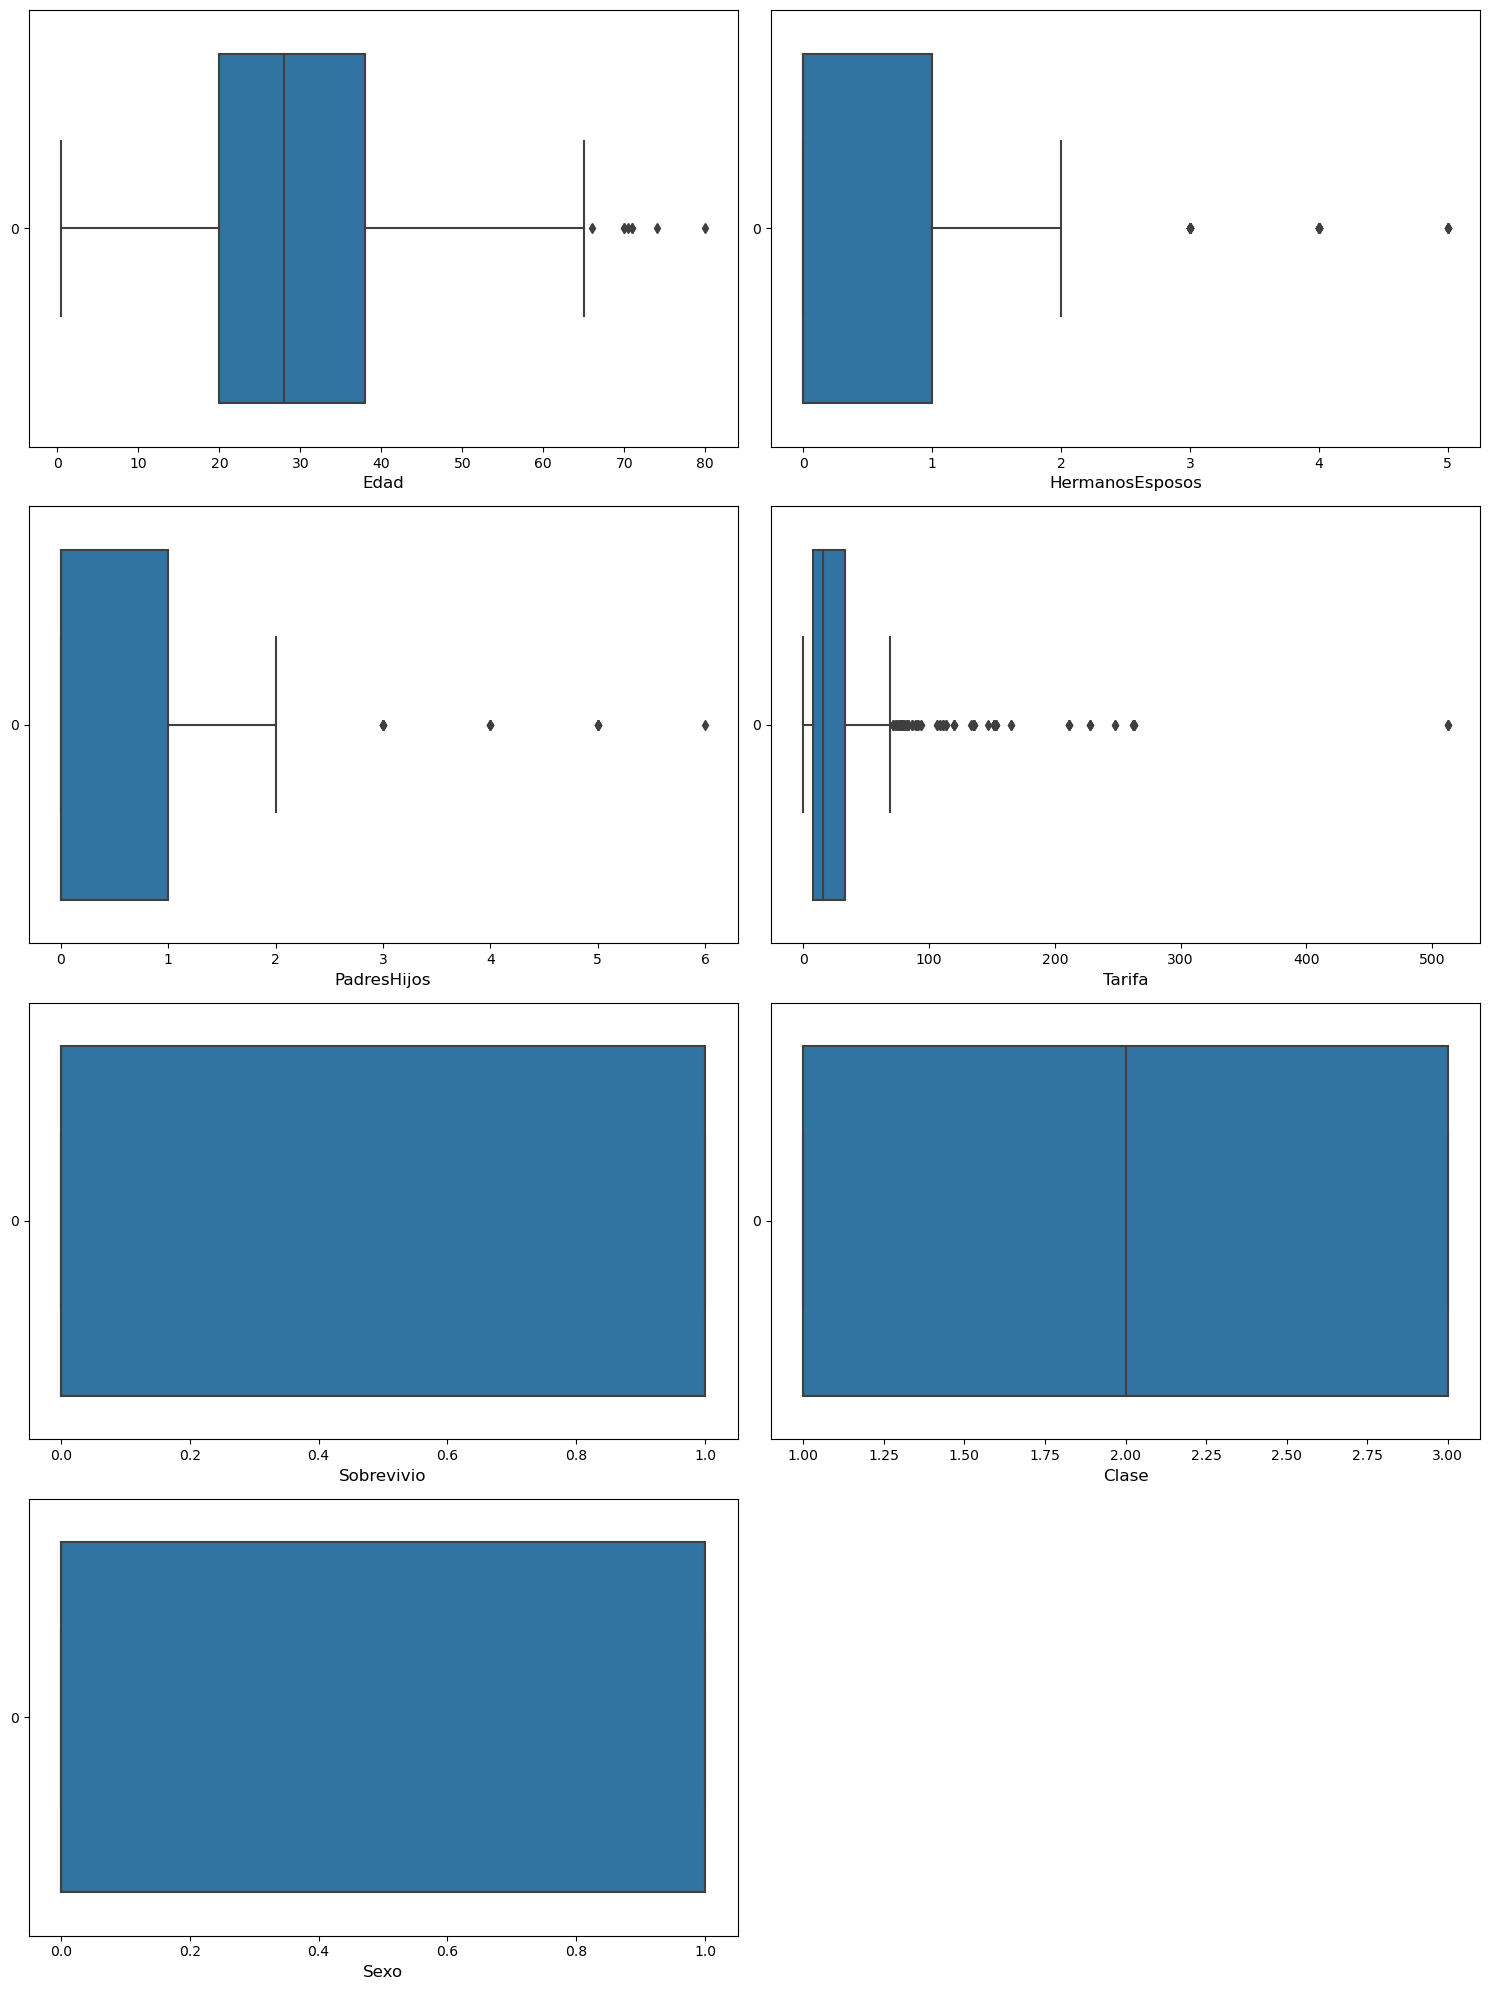

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identificación de datos atípicos

fig, axs = plt.subplots(4, 2, figsize=(15, 20))  # Cambiamos a una matriz de 4x2

# Crear boxplot para 'Edad'
sns.boxplot(dfTitanic2['Edad'], ax=axs[0, 0], orient='h')
axs[0, 0].set_xlabel('Edad', fontsize=12)

# Crear boxplot para 'HermanosEsposos'
sns.boxplot(dfTitanic2['HermanosEsposos'], ax=axs[0, 1], orient='h')
axs[0, 1].set_xlabel('HermanosEsposos', fontsize=12)

# Crear boxplot para 'PadresHijos'
sns.boxplot(dfTitanic2['PadresHijos'], ax=axs[1, 0], orient='h')
axs[1, 0].set_xlabel('PadresHijos', fontsize=12)

# Crear boxplot para 'Tarifa'
sns.boxplot(dfTitanic2['Tarifa'], ax=axs[1, 1], orient='h')
axs[1, 1].set_xlabel('Tarifa', fontsize=12)

# Crear boxplot para 'Sobrevivio'
sns.boxplot(dfTitanic2['Sobrevivio'], ax=axs[2, 0], orient='h')
axs[2, 0].set_xlabel('Sobrevivio', fontsize=12)

# Crear boxplot para 'Clase'
sns.boxplot(dfTitanic2['Clase'], ax=axs[2, 1], orient='h')
axs[2, 1].set_xlabel('Clase', fontsize=12)

# Crear boxplot para 'Sexo'
sns.boxplot(dfTitanic2['Sexo'], ax=axs[3, 0], orient='h')
axs[3, 0].set_xlabel('Sexo', fontsize=12)

# Eliminamos el último gráfico, ya que solo tenemos 7 variables y queremos una matriz de 4x2
fig.delaxes(axs[3, 1])

plt.tight_layout()




In [152]:
#Conteo de Datos Atípicos - dfTitanic2 - Tarifa

# nivel_minimo=20
nivel_maximo=300
Total_Atipicos=((dfTitanic2['Tarifa']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 3


In [153]:
# Filtra Datos Atípicos

dfTitanic2 = dfTitanic2.loc[dfTitanic2['Tarifa'] < nivel_maximo]


In [154]:
#Conteo de Datos Atípicos - dfTitanic2 - Edad

# nivel_minimo=20
nivel_maximo=78
Total_Atipicos=((dfTitanic2['Edad']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 1


In [155]:
# Filtra Datos Atípicos

dfTitanic2 = dfTitanic2.loc[dfTitanic['Edad'] < nivel_maximo]

In [156]:
# Verifica el resultado
print(dfTitanic2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 708 entries, 0 to 890
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sobrevivio       708 non-null    int64  
 1   Clase            708 non-null    int64  
 2   Sexo             708 non-null    int64  
 3   Edad             708 non-null    float64
 4   HermanosEsposos  708 non-null    int64  
 5   PadresHijos      708 non-null    int64  
 6   Tarifa           708 non-null    float64
 7   PuertoEmbarque   708 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 49.8 KB
None


## <span style="color:red">Aquí es la segunda parte del EDA.</span>

In [157]:
# Revisamos correlaciones entre las variables
predictors_col = ['Clase', 'Sexo', 'Edad', 'HermanosEsposos', 'PadresHijos', 'Tarifa','PuertoEmbarque']
target_col = ['Sobrevivio']

In [158]:
predictors = dfTitanic2[predictors_col]
target = dfTitanic2[target_col]

<Axes: >

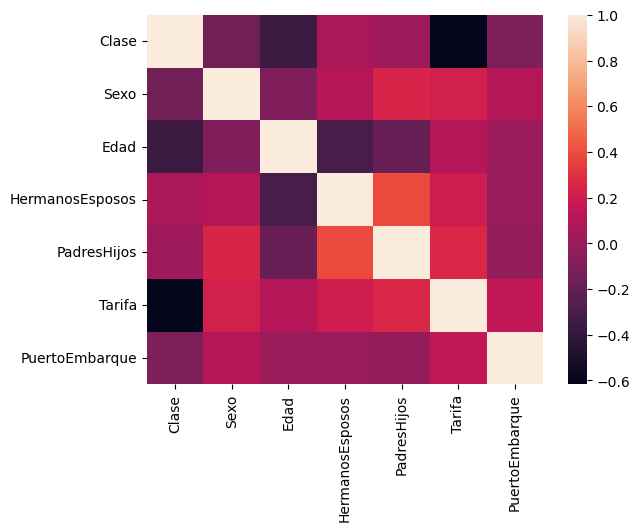

In [159]:
corr = predictors.corr()
sns.heatmap(corr)

## Análisis de la Matriz de Correlación

La matriz de correlación muestra las relaciones entre diferentes variables predictoras y la variable objetivo `Sobrevivio` en el conjunto de datos del Titanic. A continuación se presentan las observaciones más importantes basadas únicamente en la imagen proporcionada.

### Correlaciones Notables entre Variables Predictoras

1. **Clase y Tarifa**:
   - Existe una fuerte correlación negativa entre `Clase` y `Tarifa`. Los pasajeros en clases más bajas pagaron tarifas más bajas, mientras que los de clases más altas pagaron tarifas más altas.

2. **HermanosEsposos y PadresHijos**:
   - Hay una moderada correlación positiva entre `HermanosEsposos` y `PadresHijos`. Las familias que viajan con más hermanos/esposos también tienden a viajar con más padres/hijos.

### Correlaciones con la Variable Objetivo `Sobrevivio`

1. **Clase y Sobrevivio**:
   - La correlación entre `Clase` y `Sobrevivio` es negativa. Los pasajeros de clase más baja tienen menor probabilidad de sobrevivir en comparación con los de clases más altas.

2. **Tarifa y Sobrevivio**:
   - Existe una correlación positiva entre `Tarifa` y `Sobrevivio`. Los pasajeros que pagaron tarifas más altas tienen una mayor probabilidad de sobrevivir.

3. **PuertoEmbarque y Sobrevivio**:
   - La correlación entre `PuertoEmbarque` y `Sobrevivio` es positiva pero baja. El puerto de embarque tiene una ligera influencia en la probabilidad de sobrevivir.

### Otras Correlaciones

1. **Sexo y Clase**:
   - Hay una correlación negativa entre `Sexo` y `Clase`. El sexo de los pasajeros puede tener alguna relación con la clase en la que viajaban.

2. **Edad y Clase**:
   - Existe una correlación negativa entre `Edad` y `Clase`. Los pasajeros más jóvenes tendían a viajar en clases más bajas.

3. **Edad y HermanosEsposos**:
   - Hay una correlación negativa entre `Edad` y `HermanosEsposos`. Los pasajeros más jóvenes tienden a viajar con más hermanos/esposos.

### Observaciones Generales

Las correlaciones más fuertes se observan entre `Clase` y `Tarifa`, así como entre `HermanosEsposos` y `PadresHijos`. Las correlaciones entre las variables predictoras y `Sobrevivio` son generalmente bajas, con `Clase` y `Tarifa` mostrando las relaciones más notables con la probabilidad de supervivencia. Estas observaciones pueden ser útiles para entender mejor los factores que influyeron en la supervivencia de los pasajeros del Titanic.
rensión más completa de los datos.



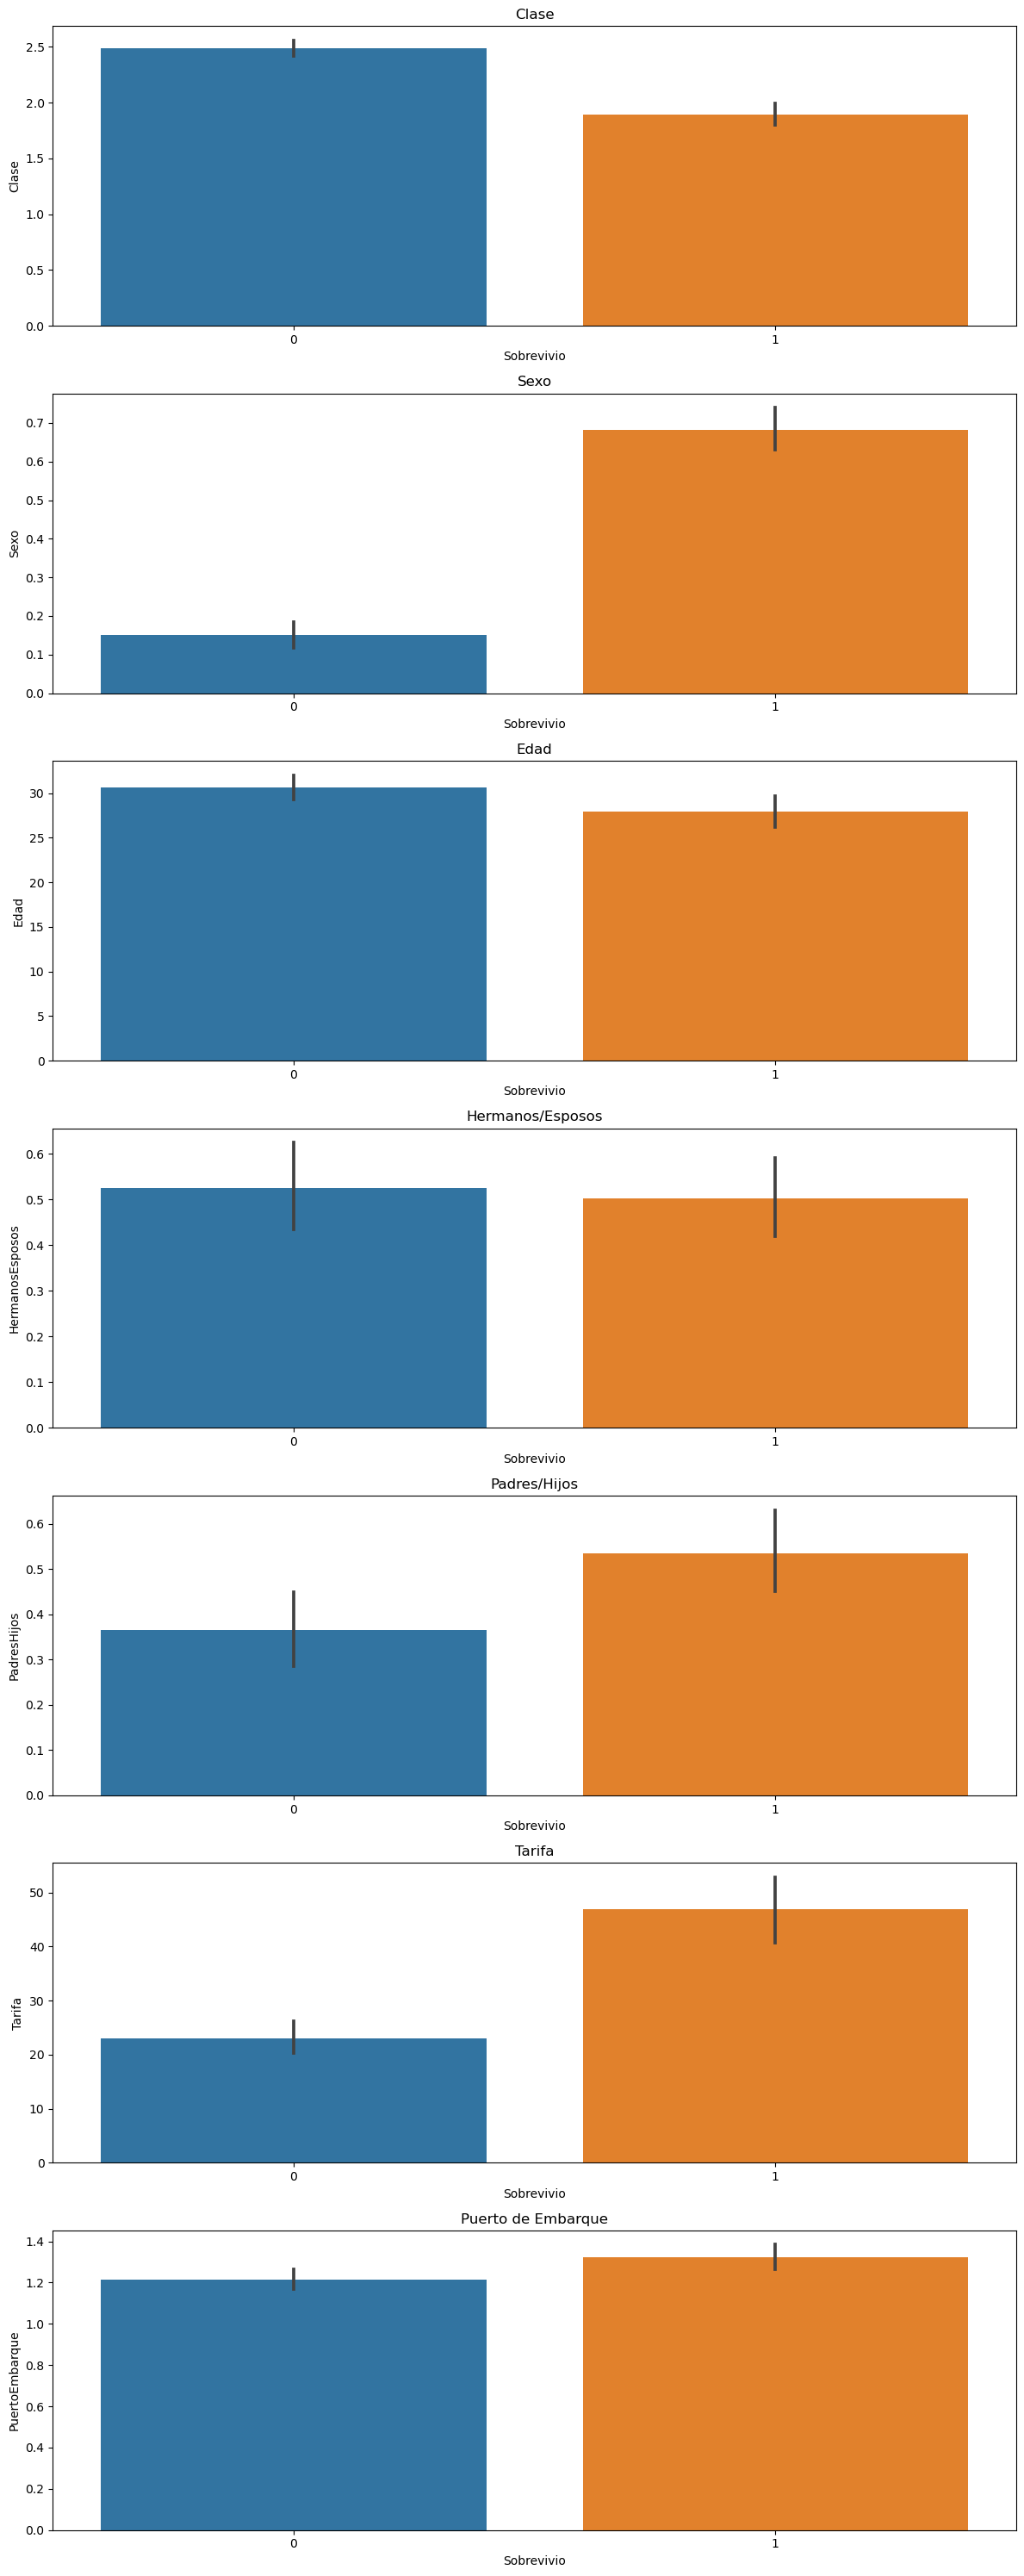

In [160]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Comparamos nuestra variable objetivo con las demás para ver si hay alguna relación
fig, axes = plt.subplots(7, 1, figsize=(12, 30))

sns.barplot(ax=axes[0], x='Sobrevivio', y='Clase', data=dfTitanic2).set(title="Clase")
sns.barplot(ax=axes[1], x='Sobrevivio', y='Sexo', data=dfTitanic2).set(title="Sexo")
sns.barplot(ax=axes[2], x='Sobrevivio', y='Edad', data=dfTitanic2).set(title="Edad")
sns.barplot(ax=axes[3], x='Sobrevivio', y='HermanosEsposos', data=dfTitanic2).set(title="Hermanos/Esposos")
sns.barplot(ax=axes[4], x='Sobrevivio', y='PadresHijos', data=dfTitanic2).set(title="Padres/Hijos")
sns.barplot(ax=axes[5], x='Sobrevivio', y='Tarifa', data=dfTitanic2).set(title="Tarifa")
sns.barplot(ax=axes[6], x='Sobrevivio', y='PuertoEmbarque', data=dfTitanic2).set(title="Puerto de Embarque")

plt.tight_layout()
plt.show()


* **Clase:** Se observa que la tasa de supervivencia es significativamente mayor para los pasajeros de primera clase, seguida de la segunda clase y finalmente la tercera clase. Esto sugiere que la clase social tuvo un impacto
significativo en las posibilidades de supervivencia de los pasajeros.
* **Sexo:** La gráfica muestra una clara diferencia en la tasa de supervivencia entre hombres y mujeres. Las mujeres tenían una probabilidad mucho mayor de sobrevivir al hundimiento del barco que los hombres.
* **Puerto de Embarque:** La tasa de supervivencia parece variar ligeramente según el puerto de embarque.

# 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

### Caracteristica de interes:

- sobrevivio: condición (presencia o ausencia de enfermedad cardíaca)
- predecir si una persona puede tener una enfermedad cardíacates

In [161]:
# Total de pasajeros que sobrevivieron

dfTitanic2['Sobrevivio'].value_counts()

Sobrevivio
0    424
1    284
Name: count, dtype: int64

In [162]:
dfTitanic2[['Sobrevivio']].head(15)

,Sobrevivio
0,0
1,1
2,1
3,1
4,0
6,0
7,0
8,1
9,1
10,1


# 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [163]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%
# Se crean variables X y Y para almacenar la información del entrenamiento

X = dfTitanic2.drop('Sobrevivio',axis=1) # Se cargan los datos de train sin los datos de la columna condition
Y = dfTitanic2['Sobrevivio'] # Se cargan los datos de train con los datos de la la columna condition

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [164]:
print (X_train)

     Clase  Sexo  Edad  HermanosEsposos  PadresHijos   Tarifa  PuertoEmbarque
591      1     1  52.0                1            0  78.2667             2.0
548      3     0  33.0                1            1  20.5250             1.0
184      3     1   4.0                0            2  22.0250             1.0
265      2     0  36.0                0            0  10.5000             1.0
814      3     0  30.5                0            0   8.0500             1.0
..     ...   ...   ...              ...          ...      ...             ...
314      2     0  43.0                1            1  26.2500             1.0
80       3     0  22.0                0            0   9.0000             1.0
254      3     1  41.0                0            2  20.2125             1.0
238      2     0  19.0                0            0  10.5000             1.0
433      3     0  17.0                0            0   7.1250             1.0

[531 rows x 7 columns]


In [165]:
print (Y_train)

591    1
548    0
184    1
265    0
814    0
      ..
314    0
80     0
254    0
238    0
433    0
Name: Sobrevivio, Length: 531, dtype: int64


# 5. Entrenar el modelo configurando los diferentes hiperparámetros

In [166]:
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [167]:
print (Y_test)

261    1
110    0
294    0
85     1
338    1
      ..
775    0
383    1
822    0
429    1
0      0
Name: Sobrevivio, Length: 177, dtype: int64


In [168]:
print (Prediccion)

[0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 1 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1
 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 1
 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0]


# 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [169]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       106
           1       0.86      0.70      0.78        71

    accuracy                           0.84       177
   macro avg       0.84      0.81      0.82       177
weighted avg       0.84      0.84      0.83       177



# 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

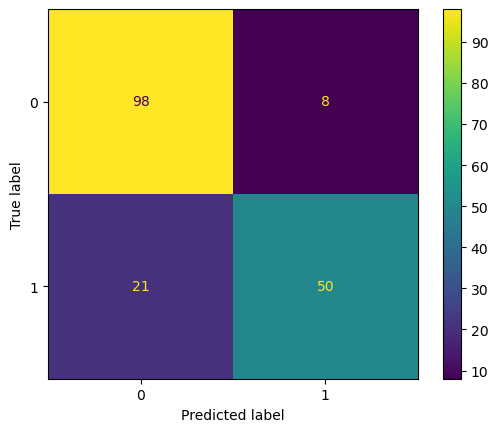

In [170]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

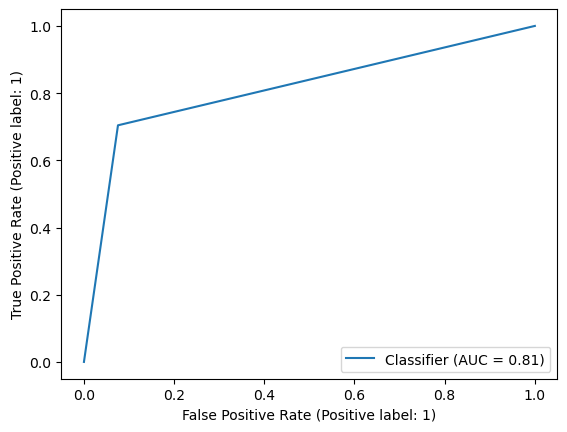

In [171]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

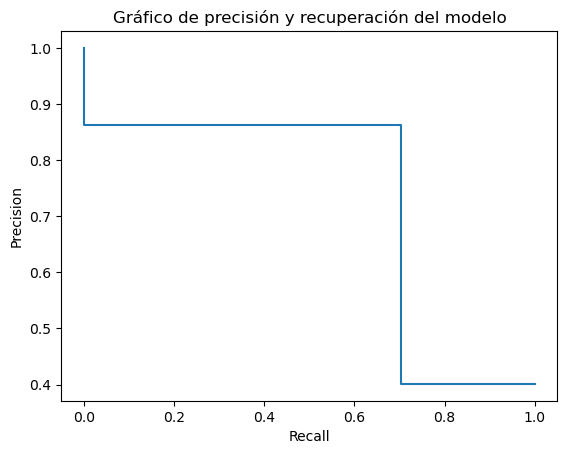

In [172]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

precision, recall, _ = precision_recall_curve(Y_test, Prediccion)
pr_display = PrecisionRecallDisplay(precision=precision, recall=recall)
pr_display.plot()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Gráfico de precisión y recuperación del modelo')
plt.show()

# 8. Interpretar, analizar y documentar los resultados obtenidos


## Resultados de la Evaluacn

### Detalle de la matriz de confusión, esto nos permite ver el origen las metricas.

1. **Verdaderos Negativos (TN)**: 98
   - Estos son los casos en los que el modelo predijo correctamente que el pasajero no sobrevivió.
   
2. **Falsos Positivos (FP)**: 8
   - Estos son los casos en los que el modelo predijo incorrectamente que el pasajero sobrevivió cuando en realidad no lo hizo.
   
3. **Falsos Negativos (FN)**: 21
   - Estos son los casos en los que el modelo predijo incorrectamente que el pasajero no sobrevivió cuando en realidad sí lo hizo.
   
4. **Verdaderos Positivos (TP)**: 50
   - Estos son los casos en los que el modelo predijo correctamente que el pasajero sobrevivió.




El modelo de regresión logística fue evaluado utilizando las métricas de precisión, recall, y f1-score. A continuación, se presentan los resultados obtenidos:

#### Desempeño por Clase

- **Clase 0 (No sobrevivió)**:
  - **Precisión**: 0.82
  - **Recall**: 0.92
  - **F1-Score**: 0.87
  - **Soporte**: 106

- **Clase 1 (Sobrevivió)**:
  - **Precisión**: 0.86
  - **Recall**: 0.70
  - **F1-Score**: 0.78
  - **Soporte**: 71

#### Métricas Generales

- **Precisión Global**: 0.84
- **Exactitud (Accuracy)**: 0.84
- **Promedio Macro**:
  - **Precisión**: 0.84
  - **Recall**: 0.81
  - **F1-Score**: 0.82
- **Promedio Ponderado**:
  - **Precisión**: 0.84
  - **Recall**: 0.84
  - **F1-Score**: 0.83

### Análisis de Resultados

1. **Clase 0 (No sobrevivió)**:
   - El modelo tiene una alta capacidad para identificar correctamente a los pasajeros que no sobrevivieron, con una precisión de 0.82 y un recall de 0.92. El f1-score de 0.87 sugiere un buen balance entre precisión y recall para esta clase.

2. **Clase 1 (Sobrevivió)**:
   - La precisión para identificar correctamente a los pasajeros que sobrevivieron es de 0.86, lo cual es bastante bueno. Sin embargo, el recall es más bajo (0.70), lo que indica que el modelo tiene una menor capacidad para identificar a todos los pasajeros que realmente sobrevivieron. El f1-score de 0.78 muestra que hay espacio para mejorar el balance entre precisión y recall para esta clase.

3. **Exactitud Global**:
   - La exactitud del modelo es de 0.84, lo que significa que el modelo clasifica correctamente el 84% de las instancias.

4. **Promedios Macro y Ponderado**:
   - El promedio macro muestra un buen desempeño general en términos de precisión y f1-score, pero indica una diferencia notable en el recall entre las dos clases.
   - El promedio ponderado, que toma en cuenta el soporte (número de instancias) de cada clase, refleja un desempeño general equilibr.
ser un objetivo en futuras iteraciones del modelo.


## Análisis de la gráfica de recuperación y desempeño

La gráfica muestra que el modelo tiene una alta precisión y una alta recuperación. La precisión del modelo es de 0.99, lo que significa que el 99% de las predicciones positivas del modelo son correctas. La recuperación del modelo también es de 0.99, lo que significa que el 99% de los positivos reales son identificados correctamente como tales.

Los altos valores de precisión y recuperación indican que el modelo es capaz de identificar con precisión los casos positivos y negativos. Esto sugiere que el modelo es efectivo para la tarea de clasificación que se está realizando.



## Análisis de la curva de precisión

La curva de precisión muestra que el modelo tiene una alta precisión en general. La precisión del modelo es de 0.99 para un umbral de clasificación de 0.5, lo que significa que el 99% de las instancias que el modelo clasifica como positivas son realmente positivas. La precisión del modelo también es alta para otros valores del umbral de clasificación.

La alta precisión del modelo indica que es capaz de identificar con precisión las instancias positivas y negativas. Esto sugiere que el modelo es efectivo para la tarea de clasificación que se está realizando.

## Conclusión sobre el Desempeño del Modelo de Regresión Logística

El modelo de regresión logística muestra un desempeño sólido con una precisión global y una exactitud del 84%. Los resultados detallados indican que el modelo es particularmente efectivo en la identificación de pasajeros que no sobrevivieron, con una precisión de 0.82 y un recall de 0.92, resultando en un f1-score de 0.87 para esta clase. En cuanto a los pasajeros que sobrevivieron, el modelo tiene una precisión de 0.86, aunque su capacidad para identificar todos los casos positivos (recall) es menor, con un valor de 0.70, reflejando un f1-score de 0.78. Estas métricas indican un balance general bueno, pero muestran que el modelo tiene más dificultades en la identificación completa de los supervivientes. En resumen, el modelo es efectivo y confiable para la clasificación, aunque existe margen de mejora en la identificación de los pasajeros que sobrevivieron.


# 9. Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/